# ReHealthCo Erstellen der Rohdatenbank 

## Vorbereitung 

###CleanUp - Eventuell gespeicherte Variablen löschen vor Ausführung des Colab books (Ziel Reproduzierbarkeit)

In [ ]:
# Löschen aller Variablen
%reset -f

# mount gdrive 
ggf. in colab-Umgebung neuen Ordner mit Namen "drive" erstellen

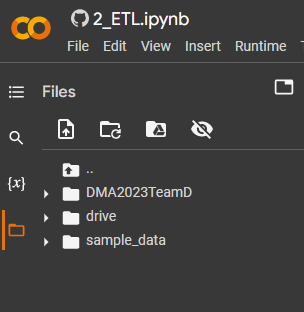

In [ ]:
!mkdir -p /content/drive
from google.colab import drive
drive.mount('/content/drive')

## import from one Google colab notebook to the other

In [ ]:
!pip install import_ipynb
!pip install ipynb

import import_ipynb
import ipynb

In [ ]:
!git clone https://github.com/Fuenfgeld/DMA2023TeamD

In [ ]:
%cd /content/DMA2023TeamD/Code

In [ ]:
!ls

In [ ]:
%run 1_ReHealthCo_Rohdatenbank.ipynb

# Einfügen einer neuen Spalte mit tod/lebendig

In [ ]:
# Anzeigen alle aktuellen Spalten in Tabelle Patienten
print(rhcpat_df.columns.tolist())

In [ ]:
# Spalte DEATHDATE dublizieren
rhcpat_df.loc[:, 'LEBENDIG'] = rhcpat_df.loc[:, 'DEATHDATE']

In [ ]:
# Anzeigen alle aktuellen Spalten
print(rhcpat_df.columns.tolist())
rhcpat_df.head(50)

# convert "LEBENDIG" to datetime

In [ ]:
rhcpat_df["LEBENDIG"] = pd.to_datetime(rhcpat_df["LEBENDIG"])
rhcpat_df.head(50)

In [ ]:
# Umbennen aller vorhandenen Daten in Spalte LEBENDIG in tod
today = pd.Timestamp.today().floor('d')
rhcpat_df.loc[rhcpat_df['LEBENDIG'] < today, 'LEBENDIG'] = "tod"
rhcpat_df.head(50)

# Todesdatum nullwerte = lebendig

In [ ]:
# NaN Werte in Spalte LEBENDIG in lebend umschreiben
rhcpat_df['LEBENDIG'] = rhcpat_df['LEBENDIG'].fillna("lebend")
rhcpat_df.head(50)

# calculate age in Tabelle rhcpat_df

# fill nall values with todays date

In [ ]:
rhcpat_df["DEATHDATE"] = rhcpat_df.DEATHDATE.fillna(pd.to_datetime("today"))

# convert to datetime

In [ ]:
rhcpat_df["DEATHDATE"] = pd.to_datetime(rhcpat_df["DEATHDATE"])
rhcpat_df["BIRTHDATE"] = pd.to_datetime(rhcpat_df["BIRTHDATE"])
rhcpat_df["AGE"] = rhcpat_df.DEATHDATE.dt.year - rhcpat_df.BIRTHDATE.dt.year

# Überprüfimg des Ergebnis

In [ ]:
# rhcpat_df.head()
# rhcpat_df.groupby("Id").size()
rhcpat_df.nunique(axis=0)

# Erstellung Dauer stationäre Krankenhaustage

In [ ]:
# Anzeigen alle aktuellen Spalten in Tabelle Encounters
print(rhcenc_df.columns.tolist())

In [ ]:
rhcenc_df["START"] = pd.to_datetime(rhcenc_df["START"])
rhcenc_df["STOP"] = pd.to_datetime(rhcenc_df["STOP"])
rhcenc_df["KRANKENHAUSDAUER"] = rhcenc_df.STOP - rhcenc_df.START
rhcenc_df.sort_values(by='KRANKENHAUSDAUER', ascending=False)

# Erstellung einer Schlüsseltabelle

In [ ]:
rhcpat_schluesseltabelle_df = rhcpat_df[["Id"]]
print(rhcpat_schluesseltabelle_df)

# Set multiple columns as Index Tabelle Patient auf FIRST und LAST

In [ ]:
rhcpat_index_df = rhcpat_df.set_index(['FIRST','LAST'], append=True)
# rhccon_index_df = rhccon_df.set_index('PATIENT', append=True) #Index sinnvoll?
# rhcmed_index_df = rhcmed_df.set_index('PATIENT', append=True) #Index sinnvoll?
# rhcenc_index_df = rhcenc_df.set_index('PATIENT', append=True) #Index sinnvoll?
print(rhcpat_index_df)
# print(rhccon_index_df) #Index sinnvoll?
# print(rhcmed_index_df) #Index sinnvoll?
# print(rhcenc_index_df) #Index sinnvoll?

Export csv file ReHealthCo Rohdatenbank

In [ ]:
%cd /content/DMA2023TeamD/csv_data

In [ ]:
!ls

In [ ]:
# dataframes als csv in rhc gespeichert
rhcpat_index_df.to_csv(f"{material_path}csv_data/rhc/rhcpat_df.csv", index=True) #mit Index!
rhcpat_schluesseltabelle_df.to_csv(f"{material_path}csv_data/rhc/rhcpat_schluesseltabelle_df.csv", index=True) #mit Index!
rhccon_df.to_csv(f"{material_path}csv_data/rhc/rhccon_df.csv", index=False)
rhcmed_df.to_csv(f"{material_path}csv_data/rhc/rhcmet_df.csv", index=False)
rhcenc_df.to_csv(f"{material_path}csv_data/rhc/rhcenc_df.csv", index=False)

In [ ]:
%cd /content/DMA2023TeamD/csv_data/rhc

In [ ]:
!ls

# Ggf. Pop-Up bestägtigen: Zulassen mehrerer Downloads!

In [ ]:
from google.colab import files
files.download(f"{material_path}csv_data/rhc/rhcpat_df.csv")
files.download(f"{material_path}csv_data/rhc/rhcpat_schluesseltabelle_df.csv")
files.download(f"{material_path}csv_data/rhc/rhccon_df.csv")
files.download(f"{material_path}csv_data/rhc/rhcmet_df.csv")
files.download(f"{material_path}csv_data/rhc/rhcenc_df.csv")

# Tabellenvereinigung nach Anonymisierung

# anonymisierte csv-files einlesen

In [ ]:
%cd /content/DMA2023TeamD/csv_data/anonym_rhc

In [ ]:
!ls

In [ ]:
# Richtiges Verzeichnis noch updaten!
csv_path_anonym_rhc = f"{material_path}csv_data/anonym_rhc"

In [ ]:
anonym_rhcpat_df = pd.read_csv(f"{csv_path_anonym_rhc}/rhcpat_df.csv")
# anonym_rhccon_df = pd.read_csv(f"{csv_path_anonym_rhc}/rhccon_df.csv")
# anonym_rhcmet_df = pd.read_csv(f"{csv_path_anonym_rhc}/rhcmet_df.csv")
# anonym_rhcenc_df = pd.read_csv(f"{csv_path_anonym_rhc}/rhcenc_df.csv")

# anonymisierte Tabellen vereinigen
## alles auskommentieren sobald csv-Upload funktioniert!

In [ ]:
# rhc_verein1_df = pd.DataFrame.merge(anonym_rhcpat_df, anonym_rhccon_df, left_on=["Id", "datenbankart"], right_on=["PATIENT", "datenbankart"], how="inner")
# rhc_verein1_df.drop("PATIENT", axis=1, inplace=True)
# rhc_verein1_df.rename(columns={"DESCRIPTION": "desc_con", "CODE": "code_con", "START": "start_con", "STOP": "stop_con"}, inplace=True)
# rhc_verein1_df.shape
# rhc_verein1_df.head()
# print(rhc_verein1_df)

In [ ]:
# rhc_verein2_df = pd.DataFrame.merge(rhc_verein1_df, anonym_rhcmed_df, left_on=["Id", "datenbankart", "ENCOUNTER"], right_on=["PATIENT", "datenbankart", "ENCOUNTER"], how="inner")
# rhc_verein2_df.drop("PATIENT", axis=1, inplace=True)
# rhc_verein2_df.rename(columns={"DESCRIPTION": "desc_med", "CODE": "code_med", "START": "start_med", "STOP": "stop_med", "REASONDESCRIPTION": "reasondesc_med", "REASONCODE": "reasoncode_med"}, inplace=True)
# rhc_verein2_df.shape
# rhc_verein2_df.head()
# print(rhc_verein2_df)

In [ ]:
# anonym_rhcenc_df.rename(columns={"Id": "id_enc"}, inplace=True)
# print(rhcenc_df)

In [ ]:
# rhc_vereinall_df = pd.DataFrame.merge(rhc_verein2_df, anonym_rhcenc_df, left_on=["Id", "datenbankart", "PAYER", "PAYER_COVERAGE"], right_on=["PATIENT", "datenbankart", "PAYER", "PAYER_COVERAGE"], how="inner")
# rhc_vereinall_df.drop("PATIENT", axis=1, inplace=True)
# rhc_vereinall_df.rename(columns={"DESCRIPTION": "desc_enc", "CODE": "code_enc", "START": "start_enc", "STOP": "stop_enc", "REASONDESCRIPTION": "reasondesc_enc", "REASONCODE": "reasoncode_enc"}, inplace=True)
# rhc_vereinall_df.shape
# rhc_vereinall_df.head()

# dataframe in sql schreiben

Erstellung der (leeren) anonymisierten Datenbanken RHC

In [ ]:
# create a temporary empty anonym_rhc_database in the memory
anonym_rhc_db = f"{material_path}/source_dbs/rehealthco.db"
anonym_rhc_conn = create_connection(rhc_db)
anonym_rhc_cur = rhc_conn.cursor()
anonym_rhc_conn.commit()
print("Database connection is successfully")

In [ ]:
# ... irgendwas mit to_sql....
# später: rhc_vereinall_df.to_sql(
anonym_rhcpat_df.to_sql(
    "RHC",# Name of SQL table.
    anonym_rhc_conn, # sqlalchemy.engine.Engine or sqlite3.Connection
    schema=None, # Something can't understand yet. just keep it.
    if_exists='replace', # How to behave if the table already exists. You can use 'replace', 'append' to replace it.
    index=True, # It means index of DataFrame will save. Set False to ignore the index of DataFrame.
    index_label="Lft_Nr", # Depend on index. 
    chunksize=None, # Just means chunksize. If DataFrame is big will need this parameter.
    dtype=None, # Set the columns type of sql table.
    method=None, # Unstable. Ignore it.
)

In [ ]:
# Cleanup
anonym_rhc_conn.commit()

In [ ]:
# Check data in RHC

anonym_rhc_cur.execute("SELECT * FROM RHC;")
rows = anonym_rhc_cur.fetchall()
for row in rows:
 print(row)

Anzeigen Dateinamen in sample data

In [ ]:
%cd /content/DMA2023TeamD/source_dbs/

In [ ]:
! ls

# Version Check

In [ ]:
#python Version
import sys
sys.version_info

In [ ]:
pd.__version__

In [ ]:
csv.__version__

In [ ]:
# Überprüfen aller Variablen
# %pip freeze

# ANPASSEN!! Calculate the Checksum of the Data Set

In [ ]:
from pandas.util import hash_pandas_object
rhcpat_df_hashes = hash_pandas_object(rhcpat_df)
rhccon_df_hashes = hash_pandas_object(rhccon_df)
rhcmed_df_hashes = hash_pandas_object(rhcmed_df)
rhcenc_df_hashes = hash_pandas_object(rhcenc_df)
rhcpat_index_df_hashes = hash_pandas_object(rhcpat_index_df)
rhcpat_schluesseltabelle_df_hashes = hash_pandas_object(rhcpat_schluesseltabelle_df)
print(rhcpat_df_hashes)
print(rhccon_df_hashes)
print(rhcmed_df_hashes)
print(rhcenc_df_hashes)
print(rhcpat_index_df)
print(rhcpat_schluesseltabelle_df)

## Value should be 
7825850388330491080

-5790193237357692379

6124240394299011028

-7931912941125174269

1175881583699170415

-3225392982667861325


In [ ]:
print(rhcpat_df_hashes.sum())
print(rhccon_df_hashes.sum())
print(rhcmed_df_hashes.sum())
print(rhcenc_df_hashes.sum())
print(rhcpat_index_df_hashes.sum())
print(rhcpat_schluesseltabelle_df_hashes.sum())